# CS 237: Homework 4 Programming Exercises

The Monty Hall problem is a classical example in probability that we discuss in more detail below. We will study a generalized version of the problem in which there are N doors and the host opens K doors (in the original problem, N = 3 and K = 1, but the game works for more general situations). The goal is to use simulation to determine which is the better strategy: switch or stay?

## The Monty Hall problem

The Monty Hall problem is loosely based on the game show Let's Make a Deal from the 1960s, hosted by Monty Hall. The problem became famous when a reader asked the following question in Marilyn vos Savant "Ask Marilyn" column in Parade magazine:

"Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, 'Do you want to pick door No. 2?' Is it to your advantage to switch your choice?"

In order to answer the question, we will need to make some assumptions. The standard ones are the following:

* The car is equally likely to be hidden behind each of the three doors.
* The player is equally likely to pick each of the three doors, regardless of the car’s location.
* After the player picks a door, the host must open a different door with a goat behind it and offer the player the choice of staying with the original door or switching.
* If the host has a choice of which door to open, then he is equally likely to select each of them.

Using a tree diagram, we can see that, under these assumptions, contestants who switch have a 2/3 probability of winning the car. This is also the anwer that vos Savant gave in her column. This problem is a famous probability puzzle because many people get it wrong. Quoting this Wikipedia [article](https://en.wikipedia.org/wiki/Monty_Hall_problem):

"Many readers of vos Savant's column refused to believe switching is beneficial despite her explanation. After the problem appeared in Parade, approximately 10,000 readers, including nearly 1,000 with PhDs, wrote to the magazine, most of them claiming vos Savant was wrong. Even when given explanations, simulations, and formal mathematical proofs, many people still do not accept that switching is the best strategy. Paul Erdős, one of the most prolific mathematicians in history, remained unconvinced until he was shown a computer simulation demonstrating the predicted result."

## The generalized Monty Hall problem

 The game is played as follows:
- There are $N$ doors for $N\ge3$.
- Behind exactly one of the doors is a prize (e.g., a car).
- The goal of the game is to select the door with the prize behind it. 
- Once you have made a selection, the host, who knows where the prize is, will open  $K$ doors, for $1\le K\le N-2$, that you did not select, and that do not contain the prize.  
- You are then given the option to  pick a new door. The goal of this first section is to determine whether or not you should swap doors by using numpy to simulate this game. 

We will break this game up into a sequence of exercises.

In [1]:
# Jupyter notebook specific 
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

# General useful imports
import numpy as np
from numpy import arange,linspace
import matplotlib.pyplot as plt  
from numpy.random import seed, randint, uniform, choice, shuffle
from collections import Counter
import pandas as pd
%matplotlib inline

## Exercise 1
 - We will use the randint function from the numpy library to simulate selecting a door uniformly at random.
 - You may assume that for $N\in\mathbb{N}, N\geq 3$ doors, their numbers are $0,1,\ldots, N-1$.
 - Finish the stub for the code that initializes the game.
 - This function should return a pair <code>(doors,winning_door)</code> where
- doors is a 1D array of length <code>number_of_doors</code>, where exactly one of the elements is a 1 (the winning door), and the rest are 0 (the losing doors)
- winning_door is the index of the winning door
    
For example, if the array is [0,0,1], then the winning door is at index 2, while the losing doors are at 0,1, and the function would return ([0,0,1],2)

In [2]:
def select_door(number_of_doors):
    return randint(number_of_doors)

def initialize_game(number_doors):
    doors = np.zeros(number_doors)         
    winning_door = select_door(number_doors)
    doors[winning_door] = 1
    return (doors,winning_door)


## Exercise 2
After the game is initialized (exercise 1), the player will choose a door (this will be done in exercise 4). Next, the host will open one or more doors, which we will simulate in this exercise.  You must write a function <code>open_doors</code> which takes

 - doors: the list generated from <code>initialize_game</code>
 - ignore_doors: a list of doors (indices into the doors array) to exclude (i.e., the door selected by the player, and the winning door) and 
 - num_doors_to_open

You must randomly generate a list of doors (opened_doors) that the host opens; these must be chosen from doors that are NOT in the list ignore_doors. The function returns a pair <code>(opened_doors, remaining_doors)</code>, where
 - opened_doors is an array containing the indices of all doors opened. 
 - remaining_doors is an array of possible doors that were not in fact opened. 
 
Basically, the game enters this function with doors separated into doors that can not be opened by the host, and doors that the host can possibly open; the game leaves this function with a partition into three subsets: doors which must be ignored, doors randomly opened by the host, and all others. This last group is the set of doors that the player could switch to.

In the case that there are 3 doors, the function should be deterministic for a fixed array. 

In [3]:
def open_doors(doors, ignore_doors, num_doors_to_open):
    opened_door=[]
    remaining_doors=[]
    choice_doors=[]
    if len(doors == 3):
        if len(ignore_doors)==2:
            for k in range(3):
                if k not in ignore_doors:
                    opened_door.append(k)
                    break
        else:
            for k in range(3):
                if k not in ignore_doors:
                    choice_doors.append(k)
            opened_door=choice(choice_doors, replace=False, size=1)
            for k in range(3):
                if k not in opened_door and k not in ignore_doors:
                    remaining_doors.append(k)
    else:
        for i in range(len(doors)):
            if i not in ignore_doors:
                choice_doors.append(i)

        opened_door =choice(choice_doors, replace=False, size= num_doors_to_open)

        for j in range(len(doors)):
            if j not in opened_door and j not in ignore_doors:
                remaining_doors.append(j)
    return opened_door, remaining_doors



## Exercise 3
Now that the game has been initialized, and the host has opened a door, complete the code stub below.

The function new_door_choice should take as input:
    - swap_behavior: the strategy the player uses encoded as an integer:
        - Always trade (0): the player will trade no matter what, and randomly select a remaining door. 
        - Never trade (1): the player will always keep their initial choice.
        - Randomly trade (2): the player tosses a fair coin:
            - if heads, he trades his door;
            - if tails, he keeps his current choice.
    - current_door: the door currently selected by the player, and 
    - rem_doors: a list of the doors the player can choose from if he decides to trade. 
 
The function should return the index at which the newly selected door is located.


In [4]:
def new_door_choice(swap_behavior, current_door, rem_doors):
    if swap_behavior==0:
        if len(rem_doors)==1:
            current_door=rem_doors[0]
        else:
            index= select_door(len(rem_doors))
            current_door= rem_doors[index]
    elif swap_behavior==2:
        to_choose = select_door(2)
        if to_choose==1:
            if len(rem_doors)==1:
                current_door=rem_doors[0]
            else:
                index= select_door(len(rem_doors))
                current_door= rem_doors[index]
    return current_door


## Exercise 4: Putting it all together
- Implement the function below to simulate playing 1 round of the Monty Hall game
- It should first initialize the doors
- Then select the players choice
- The host will then open one or more doors
- Finally, the player either keeps his door or trades
- The function should return a boolean value:
    - True if the player won the prize
    - False if he doesn't

In [5]:
def game( swap_behavior = 0,   num_doors=3, num_doors_to_open=1):
    doors, winning_door = initialize_game(num_doors)
    player_choice = select_door(num_doors)
    if (player_choice != winning_door):
        ignore_doors = [player_choice, winning_door]
    else:
        ignore_doors = [player_choice]
    opened_door, remaining_doors = open_doors(doors, ignore_doors, num_doors_to_open)
    if (winning_door != player_choice):
        remaining_doors.append(winning_door)
    picked_door = new_door_choice(swap_behavior, player_choice, remaining_doors)
    
    return picked_door==winning_door

# Hint: once implemented, uncomment this next line to test
#Counter([game(swap_behavior=1) for i in range(1000)])


## Exercise 5(a)
- Simulate playing the game 10,000 times for each strategy with 3 doors, and 1 opened door
- Display a histogram to determine which strategy has the highest chance of winning (code provided for you below)
- To do this, build a function to determine the probability of winning for each of the three strategies
Note if you do not use numpy, this next step will take a long time.

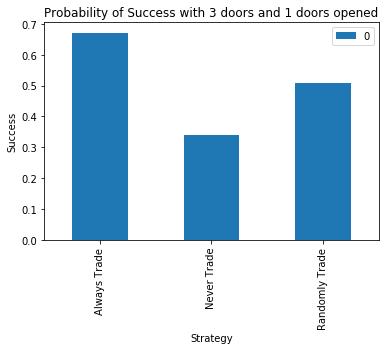

In [6]:
# return the probability of success using the given strategy
def simulate_with_strategy( swap_behavior = 0,   num_doors=3, num_doors_to_open=1 ,N=10000):
    dic = Counter([game(swap_behavior, num_doors, num_doors_to_open) for i in range(N)]) 
    return dic[True]/N

# Don't touch the rest of this cell unless you know what you are doing
strategy_map = {0: "Always Trade", 1: "Never Trade", 2: "Randomly Trade"}

def evaluate_strategy(num_doors=3, num_doors_to_open=1 ,N=10000):
    success = { }
    for i in range(3):
        success[ strategy_map[i]] = simulate_with_strategy(swap_behavior=i,
                                           num_doors=num_doors, num_doors_to_open=num_doors_to_open, N=N)
           
    df = pd.DataFrame.from_dict( success, orient='index')
    # results 
    df.plot.bar()
    plt.title("Probability of Success with " + str(num_doors)+ " doors and " + str(num_doors_to_open) + " doors opened" )
    plt.xlabel("Strategy")
    plt.ylabel("Success")
    plt.show()

evaluate_strategy()


The experiment conforms with the prediction made by the tree method. We see that the probability of success for Always Trade is about 2/3 while the probability for success of Never Trade is about 1/3. Unsurprisingly the strategy of Randomly Trading has a probability of success about 0.5.

## Exercise 5(b)
Use your solution to the previous exercise to determine what happens as the number of doors is large (say 1000) and the number of doors opened is small (say 1)
- Use N=1000

Warning: This will take a minute or so to run!

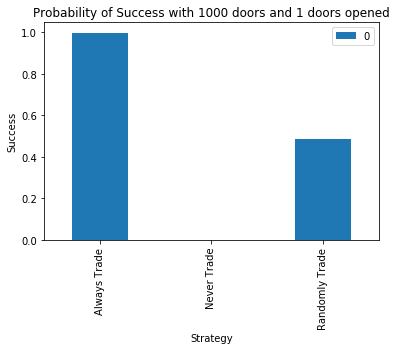

In [7]:
evaluate_strategy(num_doors=1000, num_doors_to_open=1 ,N=1000)

We see that as the number of doors gets very large while the doors to open remain at 1 the probability of success for strategy Always Trade approaches 1 while probability of success for strategy Never Trade quickly approaches 0. The probability of success for strategy Randomly Trade remains at about 0.5 as in the previous case with 3 doors. Clearly Always Trade seems to be the best strategy

## Exercise 5(c)
As in the previous exercise, use the evaluate_strategy function to determine what happens as the number of doors gets large (say 1000) and the number of doors opened is also large (say 998)
- Use N=1000

Warning: This will take a couple of minutes to run!

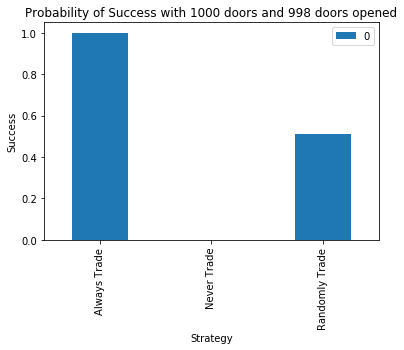

In [8]:
evaluate_strategy(num_doors=1000, num_doors_to_open=998 ,N=1000)

Again we see the same results as when running the experiment from 5(c)(large number of doors small number of doors to open). We see that as the number of doors gets very large and the doors to open also gets very large the probability of success for strategy Always Trade quickly approaches 1 while probability of success for strategy Never Trade quickly approaches 0. The probability of success for strategy Randomly Trade remains at about 0.5 as in the previous case with 3 doors. Clearly Always Trade seems to be the best strategy